## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras
import itertools

# 設定 GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 553s 3us/step


In [3]:
## 資料前處理函式
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
"""
建立神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.7, 0.9, 0.95, 0.99]
NESTEROV = [True, False]

In [7]:
results = {}
for lr, momentum, nesterov in itertools.product(LEARNING_RATE, MOMENTUM, NESTEROV):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f, Momentum = %.2f, Nesterov = %s" % (lr, momentum, str(nesterov)))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=nesterov, momentum=momentum)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s-momemtum-%s-nesterov-%s" % (str(lr), str(momentum), str(nesterov))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000, Momentum = 0.70, Nesterov = True
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
196/196 [==========================

196/196 [==============================] - 2s 10ms/step - loss: 0.7249 - accuracy: 0.7366 - val_loss: 2.0509 - val_accuracy: 0.4686
Experiment with LR = 0.100000, Momentum = 0.70, Nesterov = False
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non

Epoch 50/50
196/196 [==============================] - 2s 9ms/step - loss: 0.6995 - accuracy: 0.7472 - val_loss: 1.8026 - val_accuracy: 0.4961
Experiment with LR = 0.100000, Momentum = 0.90, Nesterov = True
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,7

196/196 [==============================] - 2s 10ms/step - loss: 1.1577 - accuracy: 0.5846 - val_loss: 1.6337 - val_accuracy: 0.4561
Epoch 50/50
196/196 [==============================] - 2s 9ms/step - loss: 1.1593 - accuracy: 0.5836 - val_loss: 1.6280 - val_accuracy: 0.4784
Experiment with LR = 0.100000, Momentum = 0.90, Nesterov = False
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
____________________________________________

196/196 [==============================] - 2s 10ms/step - loss: 1.2654 - accuracy: 0.5466 - val_loss: 1.5934 - val_accuracy: 0.4674
Epoch 49/50
196/196 [==============================] - 2s 10ms/step - loss: 1.2648 - accuracy: 0.5472 - val_loss: 1.5762 - val_accuracy: 0.4667
Epoch 50/50
196/196 [==============================] - 2s 10ms/step - loss: 1.2556 - accuracy: 0.5511 - val_loss: 1.6316 - val_accuracy: 0.4636
Experiment with LR = 0.100000, Momentum = 0.95, Nesterov = True
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
________________________________

196/196 [==============================] - 2s 10ms/step - loss: 1.4483 - accuracy: 0.4880 - val_loss: 1.7016 - val_accuracy: 0.4261
Epoch 48/50
196/196 [==============================] - 2s 10ms/step - loss: 1.4563 - accuracy: 0.4886 - val_loss: 1.6627 - val_accuracy: 0.4345
Epoch 49/50
196/196 [==============================] - 2s 10ms/step - loss: 1.4521 - accuracy: 0.4903 - val_loss: 1.5810 - val_accuracy: 0.4527
Epoch 50/50
196/196 [==============================] - 2s 10ms/step - loss: 1.4390 - accuracy: 0.4969 - val_loss: 1.6508 - val_accuracy: 0.4272
Experiment with LR = 0.100000, Momentum = 0.95, Nesterov = False
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
___________________

196/196 [==============================] - 2s 10ms/step - loss: 2.3044 - accuracy: 0.1009 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 47/50
196/196 [==============================] - 2s 10ms/step - loss: 2.3045 - accuracy: 0.0995 - val_loss: 2.3041 - val_accuracy: 0.1000
Epoch 48/50
196/196 [==============================] - 2s 10ms/step - loss: 2.3053 - accuracy: 0.0976 - val_loss: 2.3039 - val_accuracy: 0.1000
Epoch 49/50
196/196 [==============================] - 2s 10ms/step - loss: 2.3042 - accuracy: 0.0990 - val_loss: 2.3036 - val_accuracy: 0.1000
Epoch 50/50
196/196 [==============================] - 2s 10ms/step - loss: 2.3041 - accuracy: 0.1000 - val_loss: 2.3034 - val_accuracy: 0.1000
Experiment with LR = 0.100000, Momentum = 0.99, Nesterov = True
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
________

196/196 [==============================] - 2s 10ms/step - loss: 2.3083 - accuracy: 0.1003 - val_loss: 2.3065 - val_accuracy: 0.1000
Epoch 46/50
196/196 [==============================] - 2s 10ms/step - loss: 2.3083 - accuracy: 0.0989 - val_loss: 2.3071 - val_accuracy: 0.1000
Epoch 47/50
196/196 [==============================] - 2s 10ms/step - loss: 2.3060 - accuracy: 0.0982 - val_loss: 2.3052 - val_accuracy: 0.1000
Epoch 48/50
196/196 [==============================] - 2s 10ms/step - loss: 2.3069 - accuracy: 0.1031 - val_loss: 2.3099 - val_accuracy: 0.1000
Epoch 49/50
196/196 [==============================] - 2s 10ms/step - loss: 2.3062 - accuracy: 0.1014 - val_loss: 2.3054 - val_accuracy: 0.1000
Epoch 50/50
196/196 [==============================] - 2s 10ms/step - loss: 2.3061 - accuracy: 0.0998 - val_loss: 2.3081 - val_accuracy: 0.1000
Experiment with LR = 0.100000, Momentum = 0.99, Nesterov = False
Model: "functional_1"
_____________________________________________________________

196/196 [==============================] - 2s 10ms/step - loss: 2.3123 - accuracy: 0.1002 - val_loss: 2.3109 - val_accuracy: 0.1000
Epoch 45/50
196/196 [==============================] - 2s 10ms/step - loss: 2.3098 - accuracy: 0.1003 - val_loss: 2.3126 - val_accuracy: 0.1000
Epoch 46/50
196/196 [==============================] - 2s 10ms/step - loss: 2.3095 - accuracy: 0.1016 - val_loss: 2.3142 - val_accuracy: 0.1000
Epoch 47/50
196/196 [==============================] - 2s 10ms/step - loss: 2.3114 - accuracy: 0.0981 - val_loss: 2.3136 - val_accuracy: 0.1000
Epoch 48/50
196/196 [==============================] - 2s 10ms/step - loss: 2.3113 - accuracy: 0.1022 - val_loss: 2.3109 - val_accuracy: 0.1000
Epoch 49/50
196/196 [==============================] - 2s 10ms/step - loss: 2.3106 - accuracy: 0.0979 - val_loss: 2.3090 - val_accuracy: 0.1000
Epoch 50/50
196/196 [==============================] - 2s 10ms/step - loss: 2.3145 - accuracy: 0.1019 - val_loss: 2.3065 - val_accuracy: 0.1000
Expe

196/196 [==============================] - 2s 10ms/step - loss: 0.9292 - accuracy: 0.6750 - val_loss: 1.4677 - val_accuracy: 0.5098
Epoch 44/50
196/196 [==============================] - 2s 10ms/step - loss: 0.9115 - accuracy: 0.6790 - val_loss: 1.4954 - val_accuracy: 0.4969
Epoch 45/50
196/196 [==============================] - 2s 10ms/step - loss: 0.9017 - accuracy: 0.6857 - val_loss: 1.4608 - val_accuracy: 0.5002
Epoch 46/50
196/196 [==============================] - 2s 10ms/step - loss: 0.8846 - accuracy: 0.6904 - val_loss: 1.5022 - val_accuracy: 0.5129
Epoch 47/50
196/196 [==============================] - 2s 10ms/step - loss: 0.8817 - accuracy: 0.6905 - val_loss: 1.6045 - val_accuracy: 0.4897
Epoch 48/50
196/196 [==============================] - 2s 10ms/step - loss: 0.8637 - accuracy: 0.6979 - val_loss: 1.3937 - val_accuracy: 0.5286
Epoch 49/50
196/196 [==============================] - 2s 10ms/step - loss: 0.8518 - accuracy: 0.7022 - val_loss: 1.7287 - val_accuracy: 0.4689
Epoc

196/196 [==============================] - 2s 10ms/step - loss: 0.9152 - accuracy: 0.6784 - val_loss: 1.4975 - val_accuracy: 0.5106
Epoch 43/50
196/196 [==============================] - 2s 10ms/step - loss: 0.9186 - accuracy: 0.6753 - val_loss: 1.4780 - val_accuracy: 0.5057
Epoch 44/50
196/196 [==============================] - 2s 10ms/step - loss: 0.9039 - accuracy: 0.6802 - val_loss: 1.4791 - val_accuracy: 0.5058
Epoch 45/50
196/196 [==============================] - 2s 10ms/step - loss: 0.8826 - accuracy: 0.6895 - val_loss: 1.4552 - val_accuracy: 0.5117
Epoch 46/50
196/196 [==============================] - 2s 10ms/step - loss: 0.8744 - accuracy: 0.6921 - val_loss: 1.4199 - val_accuracy: 0.5267
Epoch 47/50
196/196 [==============================] - 2s 10ms/step - loss: 0.8522 - accuracy: 0.7000 - val_loss: 1.3853 - val_accuracy: 0.5361
Epoch 48/50
196/196 [==============================] - 2s 10ms/step - loss: 0.8581 - accuracy: 0.6974 - val_loss: 1.5584 - val_accuracy: 0.4973
Epoc

196/196 [==============================] - 2s 10ms/step - loss: 0.5823 - accuracy: 0.7943 - val_loss: 1.7744 - val_accuracy: 0.5110
Epoch 42/50
196/196 [==============================] - 2s 10ms/step - loss: 0.5655 - accuracy: 0.8005 - val_loss: 1.6648 - val_accuracy: 0.5351
Epoch 43/50
196/196 [==============================] - 2s 10ms/step - loss: 0.5440 - accuracy: 0.8082 - val_loss: 1.8106 - val_accuracy: 0.5210
Epoch 44/50
196/196 [==============================] - 2s 10ms/step - loss: 0.5301 - accuracy: 0.8111 - val_loss: 1.7433 - val_accuracy: 0.5279
Epoch 45/50
196/196 [==============================] - 2s 10ms/step - loss: 0.5093 - accuracy: 0.8203 - val_loss: 1.7741 - val_accuracy: 0.5265
Epoch 46/50
196/196 [==============================] - 2s 10ms/step - loss: 0.4933 - accuracy: 0.8247 - val_loss: 1.8406 - val_accuracy: 0.5316
Epoch 47/50
196/196 [==============================] - 2s 10ms/step - loss: 0.4661 - accuracy: 0.8363 - val_loss: 1.9283 - val_accuracy: 0.5231
Epoc

196/196 [==============================] - 2s 10ms/step - loss: 0.7473 - accuracy: 0.7331 - val_loss: 1.5003 - val_accuracy: 0.5393
Epoch 41/50
196/196 [==============================] - 2s 10ms/step - loss: 0.7456 - accuracy: 0.7332 - val_loss: 1.4830 - val_accuracy: 0.5253
Epoch 42/50
196/196 [==============================] - 2s 10ms/step - loss: 0.7205 - accuracy: 0.7422 - val_loss: 1.5712 - val_accuracy: 0.5340
Epoch 43/50
196/196 [==============================] - 2s 10ms/step - loss: 0.6984 - accuracy: 0.7494 - val_loss: 1.5112 - val_accuracy: 0.5422
Epoch 44/50
196/196 [==============================] - 2s 10ms/step - loss: 0.6746 - accuracy: 0.7598 - val_loss: 1.5394 - val_accuracy: 0.5344
Epoch 45/50
196/196 [==============================] - 2s 10ms/step - loss: 0.6661 - accuracy: 0.7607 - val_loss: 1.5757 - val_accuracy: 0.5355
Epoch 46/50
196/196 [==============================] - 2s 10ms/step - loss: 0.6607 - accuracy: 0.7625 - val_loss: 1.6137 - val_accuracy: 0.5240
Epoc

196/196 [==============================] - 2s 10ms/step - loss: 0.5443 - accuracy: 0.8034 - val_loss: 1.8576 - val_accuracy: 0.5263
Epoch 40/50
196/196 [==============================] - 2s 10ms/step - loss: 0.5347 - accuracy: 0.8083 - val_loss: 1.8893 - val_accuracy: 0.5254
Epoch 41/50
196/196 [==============================] - 2s 10ms/step - loss: 0.5132 - accuracy: 0.8162 - val_loss: 1.9225 - val_accuracy: 0.5199
Epoch 42/50
196/196 [==============================] - 2s 10ms/step - loss: 0.5002 - accuracy: 0.8209 - val_loss: 1.9292 - val_accuracy: 0.5278
Epoch 43/50
196/196 [==============================] - 2s 10ms/step - loss: 0.4764 - accuracy: 0.8295 - val_loss: 2.0240 - val_accuracy: 0.5121
Epoch 44/50
196/196 [==============================] - 2s 10ms/step - loss: 0.4578 - accuracy: 0.8347 - val_loss: 1.9493 - val_accuracy: 0.5328
Epoch 45/50
196/196 [==============================] - 2s 10ms/step - loss: 0.4428 - accuracy: 0.8406 - val_loss: 1.9721 - val_accuracy: 0.5237
Epoc

196/196 [==============================] - 2s 10ms/step - loss: 0.7910 - accuracy: 0.7155 - val_loss: 1.5129 - val_accuracy: 0.5261
Epoch 39/50
196/196 [==============================] - 2s 10ms/step - loss: 0.7959 - accuracy: 0.7151 - val_loss: 1.5135 - val_accuracy: 0.5343
Epoch 40/50
196/196 [==============================] - 2s 10ms/step - loss: 0.7578 - accuracy: 0.7298 - val_loss: 1.5584 - val_accuracy: 0.5211
Epoch 41/50
196/196 [==============================] - 2s 10ms/step - loss: 0.7590 - accuracy: 0.7274 - val_loss: 1.5729 - val_accuracy: 0.5188
Epoch 42/50
196/196 [==============================] - 2s 10ms/step - loss: 0.7358 - accuracy: 0.7361 - val_loss: 1.5831 - val_accuracy: 0.5249
Epoch 43/50
196/196 [==============================] - 2s 10ms/step - loss: 0.7107 - accuracy: 0.7454 - val_loss: 1.5568 - val_accuracy: 0.5343
Epoch 44/50
196/196 [==============================] - 2s 10ms/step - loss: 0.7079 - accuracy: 0.7465 - val_loss: 1.6940 - val_accuracy: 0.5233
Epoc

196/196 [==============================] - 2s 10ms/step - loss: 0.8778 - accuracy: 0.6895 - val_loss: 1.7275 - val_accuracy: 0.4873
Epoch 38/50
196/196 [==============================] - 2s 10ms/step - loss: 0.8630 - accuracy: 0.6922 - val_loss: 1.7781 - val_accuracy: 0.5021
Epoch 39/50
196/196 [==============================] - 2s 10ms/step - loss: 0.8367 - accuracy: 0.7011 - val_loss: 1.8466 - val_accuracy: 0.4980
Epoch 40/50
196/196 [==============================] - 2s 10ms/step - loss: 0.8145 - accuracy: 0.7103 - val_loss: 1.8532 - val_accuracy: 0.4911
Epoch 41/50
196/196 [==============================] - 2s 10ms/step - loss: 0.8085 - accuracy: 0.7112 - val_loss: 1.8224 - val_accuracy: 0.4826
Epoch 42/50
196/196 [==============================] - 2s 10ms/step - loss: 0.7815 - accuracy: 0.7204 - val_loss: 1.9148 - val_accuracy: 0.4904
Epoch 43/50
196/196 [==============================] - 2s 10ms/step - loss: 0.7754 - accuracy: 0.7224 - val_loss: 1.9585 - val_accuracy: 0.4960
Epoc

196/196 [==============================] - 2s 10ms/step - loss: 1.3414 - accuracy: 0.5241 - val_loss: 1.5512 - val_accuracy: 0.4744
Epoch 37/50
196/196 [==============================] - 2s 10ms/step - loss: 1.3367 - accuracy: 0.5261 - val_loss: 1.5307 - val_accuracy: 0.4785
Epoch 38/50
196/196 [==============================] - 2s 10ms/step - loss: 1.3673 - accuracy: 0.5139 - val_loss: 1.5390 - val_accuracy: 0.4726
Epoch 39/50
196/196 [==============================] - 2s 10ms/step - loss: 1.3525 - accuracy: 0.5236 - val_loss: 1.5344 - val_accuracy: 0.4796
Epoch 40/50
196/196 [==============================] - 2s 10ms/step - loss: 1.3111 - accuracy: 0.5366 - val_loss: 1.5474 - val_accuracy: 0.4732
Epoch 41/50
196/196 [==============================] - 2s 10ms/step - loss: 1.3198 - accuracy: 0.5330 - val_loss: 1.5343 - val_accuracy: 0.4708
Epoch 42/50
196/196 [==============================] - 2s 10ms/step - loss: 1.2818 - accuracy: 0.5448 - val_loss: 1.5256 - val_accuracy: 0.4886
Epoc

196/196 [==============================] - 2s 10ms/step - loss: 1.5480 - accuracy: 0.4562 - val_loss: 1.5597 - val_accuracy: 0.4567
Epoch 36/50
196/196 [==============================] - 2s 10ms/step - loss: 1.5420 - accuracy: 0.4582 - val_loss: 1.5595 - val_accuracy: 0.4510
Epoch 37/50
196/196 [==============================] - 2s 10ms/step - loss: 1.5358 - accuracy: 0.4602 - val_loss: 1.5542 - val_accuracy: 0.4556
Epoch 38/50
196/196 [==============================] - 2s 10ms/step - loss: 1.5301 - accuracy: 0.4619 - val_loss: 1.5632 - val_accuracy: 0.4508
Epoch 39/50
196/196 [==============================] - 2s 10ms/step - loss: 1.5248 - accuracy: 0.4645 - val_loss: 1.5402 - val_accuracy: 0.4592
Epoch 40/50
196/196 [==============================] - 2s 10ms/step - loss: 1.5185 - accuracy: 0.4666 - val_loss: 1.5430 - val_accuracy: 0.4593
Epoch 41/50
196/196 [==============================] - 2s 10ms/step - loss: 1.5135 - accuracy: 0.4693 - val_loss: 1.5333 - val_accuracy: 0.4591
Epoc

196/196 [==============================] - 2s 10ms/step - loss: 1.5480 - accuracy: 0.4601 - val_loss: 1.5757 - val_accuracy: 0.4478
Epoch 35/50
196/196 [==============================] - 2s 10ms/step - loss: 1.5417 - accuracy: 0.4624 - val_loss: 1.5611 - val_accuracy: 0.4548
Epoch 36/50
196/196 [==============================] - 2s 10ms/step - loss: 1.5352 - accuracy: 0.4640 - val_loss: 1.5585 - val_accuracy: 0.4543
Epoch 37/50
196/196 [==============================] - 2s 10ms/step - loss: 1.5301 - accuracy: 0.4658 - val_loss: 1.5517 - val_accuracy: 0.4606
Epoch 38/50
196/196 [==============================] - 2s 10ms/step - loss: 1.5238 - accuracy: 0.4675 - val_loss: 1.5471 - val_accuracy: 0.4572
Epoch 39/50
196/196 [==============================] - 2s 10ms/step - loss: 1.5179 - accuracy: 0.4702 - val_loss: 1.5458 - val_accuracy: 0.4589
Epoch 40/50
196/196 [==============================] - 2s 10ms/step - loss: 1.5129 - accuracy: 0.4709 - val_loss: 1.5422 - val_accuracy: 0.4579
Epoc

196/196 [==============================] - 2s 10ms/step - loss: 1.2717 - accuracy: 0.5551 - val_loss: 1.4355 - val_accuracy: 0.4946
Epoch 34/50
196/196 [==============================] - 2s 10ms/step - loss: 1.2635 - accuracy: 0.5554 - val_loss: 1.3770 - val_accuracy: 0.5093
Epoch 35/50
196/196 [==============================] - 2s 10ms/step - loss: 1.2523 - accuracy: 0.5598 - val_loss: 1.3843 - val_accuracy: 0.5086
Epoch 36/50
196/196 [==============================] - 2s 10ms/step - loss: 1.2436 - accuracy: 0.5627 - val_loss: 1.3716 - val_accuracy: 0.5110
Epoch 37/50
196/196 [==============================] - 2s 10ms/step - loss: 1.2365 - accuracy: 0.5665 - val_loss: 1.3809 - val_accuracy: 0.5078
Epoch 38/50
196/196 [==============================] - 2s 10ms/step - loss: 1.2241 - accuracy: 0.5705 - val_loss: 1.3608 - val_accuracy: 0.5148
Epoch 39/50
196/196 [==============================] - 2s 10ms/step - loss: 1.2174 - accuracy: 0.5725 - val_loss: 1.3678 - val_accuracy: 0.5116
Epoc

196/196 [==============================] - 2s 10ms/step - loss: 1.3048 - accuracy: 0.5423 - val_loss: 1.4083 - val_accuracy: 0.4985
Epoch 33/50
196/196 [==============================] - 2s 10ms/step - loss: 1.2952 - accuracy: 0.5453 - val_loss: 1.3980 - val_accuracy: 0.5046
Epoch 34/50
196/196 [==============================] - 2s 10ms/step - loss: 1.2885 - accuracy: 0.5486 - val_loss: 1.3800 - val_accuracy: 0.5084
Epoch 35/50
196/196 [==============================] - 2s 10ms/step - loss: 1.2765 - accuracy: 0.5529 - val_loss: 1.3819 - val_accuracy: 0.5057
Epoch 36/50
196/196 [==============================] - 2s 10ms/step - loss: 1.2696 - accuracy: 0.5547 - val_loss: 1.3935 - val_accuracy: 0.5057
Epoch 37/50
196/196 [==============================] - 2s 10ms/step - loss: 1.2596 - accuracy: 0.5569 - val_loss: 1.3926 - val_accuracy: 0.5044
Epoch 38/50
196/196 [==============================] - 2s 10ms/step - loss: 1.2511 - accuracy: 0.5623 - val_loss: 1.3959 - val_accuracy: 0.5033
Epoc

196/196 [==============================] - 2s 10ms/step - loss: 1.1144 - accuracy: 0.6071 - val_loss: 1.3415 - val_accuracy: 0.5306
Epoch 32/50
196/196 [==============================] - 2s 10ms/step - loss: 1.1004 - accuracy: 0.6120 - val_loss: 1.4451 - val_accuracy: 0.5004
Epoch 33/50
196/196 [==============================] - 2s 10ms/step - loss: 1.0873 - accuracy: 0.6162 - val_loss: 1.3632 - val_accuracy: 0.5180
Epoch 34/50
196/196 [==============================] - 2s 10ms/step - loss: 1.0716 - accuracy: 0.6239 - val_loss: 1.4067 - val_accuracy: 0.5101
Epoch 35/50
196/196 [==============================] - 2s 10ms/step - loss: 1.0608 - accuracy: 0.6266 - val_loss: 1.3622 - val_accuracy: 0.5204
Epoch 36/50
196/196 [==============================] - 2s 10ms/step - loss: 1.0464 - accuracy: 0.6296 - val_loss: 1.3812 - val_accuracy: 0.5193
Epoch 37/50
196/196 [==============================] - 2s 10ms/step - loss: 1.0368 - accuracy: 0.6378 - val_loss: 1.3707 - val_accuracy: 0.5235
Epoc

196/196 [==============================] - 2s 10ms/step - loss: 1.1854 - accuracy: 0.5811 - val_loss: 1.3422 - val_accuracy: 0.5215
Epoch 31/50
196/196 [==============================] - 2s 10ms/step - loss: 1.1622 - accuracy: 0.5905 - val_loss: 1.3215 - val_accuracy: 0.5327
Epoch 32/50
196/196 [==============================] - 2s 10ms/step - loss: 1.1584 - accuracy: 0.5905 - val_loss: 1.3621 - val_accuracy: 0.5187
Epoch 33/50
196/196 [==============================] - 2s 10ms/step - loss: 1.1355 - accuracy: 0.5980 - val_loss: 1.3303 - val_accuracy: 0.5258
Epoch 34/50
196/196 [==============================] - 2s 10ms/step - loss: 1.1262 - accuracy: 0.6033 - val_loss: 1.3158 - val_accuracy: 0.5340
Epoch 35/50
196/196 [==============================] - 2s 10ms/step - loss: 1.1224 - accuracy: 0.6047 - val_loss: 1.3243 - val_accuracy: 0.5274
Epoch 36/50
196/196 [==============================] - 2s 10ms/step - loss: 1.1104 - accuracy: 0.6087 - val_loss: 1.3231 - val_accuracy: 0.5331
Epoc

196/196 [==============================] - 2s 10ms/step - loss: 0.8778 - accuracy: 0.6856 - val_loss: 1.4392 - val_accuracy: 0.5318
Epoch 30/50
196/196 [==============================] - 2s 10ms/step - loss: 0.8499 - accuracy: 0.6994 - val_loss: 1.4467 - val_accuracy: 0.5292
Epoch 31/50
196/196 [==============================] - 2s 10ms/step - loss: 0.8242 - accuracy: 0.7064 - val_loss: 1.4242 - val_accuracy: 0.5361
Epoch 32/50
196/196 [==============================] - 2s 10ms/step - loss: 0.7974 - accuracy: 0.7177 - val_loss: 1.4713 - val_accuracy: 0.5323
Epoch 33/50
196/196 [==============================] - 2s 10ms/step - loss: 0.7842 - accuracy: 0.7218 - val_loss: 1.4563 - val_accuracy: 0.5418
Epoch 34/50
196/196 [==============================] - 2s 10ms/step - loss: 0.7650 - accuracy: 0.7285 - val_loss: 1.4616 - val_accuracy: 0.5361
Epoch 35/50
196/196 [==============================] - 2s 10ms/step - loss: 0.7351 - accuracy: 0.7382 - val_loss: 1.5011 - val_accuracy: 0.5366
Epoc

196/196 [==============================] - 2s 10ms/step - loss: 1.0377 - accuracy: 0.6275 - val_loss: 1.3379 - val_accuracy: 0.5312
Epoch 29/50
196/196 [==============================] - 2s 10ms/step - loss: 1.0370 - accuracy: 0.6319 - val_loss: 1.3404 - val_accuracy: 0.5336
Epoch 30/50
196/196 [==============================] - 2s 10ms/step - loss: 1.0296 - accuracy: 0.6337 - val_loss: 1.3781 - val_accuracy: 0.5279
Epoch 31/50
196/196 [==============================] - 2s 10ms/step - loss: 1.0122 - accuracy: 0.6411 - val_loss: 1.3283 - val_accuracy: 0.5385
Epoch 32/50
196/196 [==============================] - 2s 10ms/step - loss: 0.9951 - accuracy: 0.6449 - val_loss: 1.3499 - val_accuracy: 0.5351
Epoch 33/50
196/196 [==============================] - 2s 10ms/step - loss: 0.9733 - accuracy: 0.6523 - val_loss: 1.3544 - val_accuracy: 0.5358
Epoch 34/50
196/196 [==============================] - 2s 10ms/step - loss: 0.9661 - accuracy: 0.6560 - val_loss: 1.3724 - val_accuracy: 0.5296
Epoc

196/196 [==============================] - 2s 10ms/step - loss: 1.9362 - accuracy: 0.3212 - val_loss: 1.9280 - val_accuracy: 0.3305
Epoch 28/50
196/196 [==============================] - 2s 10ms/step - loss: 1.9303 - accuracy: 0.3239 - val_loss: 1.9223 - val_accuracy: 0.3326
Epoch 29/50
196/196 [==============================] - 2s 10ms/step - loss: 1.9247 - accuracy: 0.3260 - val_loss: 1.9170 - val_accuracy: 0.3340
Epoch 30/50
196/196 [==============================] - 2s 10ms/step - loss: 1.9193 - accuracy: 0.3281 - val_loss: 1.9117 - val_accuracy: 0.3360
Epoch 31/50
196/196 [==============================] - 2s 10ms/step - loss: 1.9142 - accuracy: 0.3293 - val_loss: 1.9067 - val_accuracy: 0.3370
Epoch 32/50
196/196 [==============================] - 2s 10ms/step - loss: 1.9092 - accuracy: 0.3306 - val_loss: 1.9021 - val_accuracy: 0.3368
Epoch 33/50
196/196 [==============================] - 2s 10ms/step - loss: 1.9045 - accuracy: 0.3325 - val_loss: 1.8973 - val_accuracy: 0.3415
Epoc

196/196 [==============================] - 2s 10ms/step - loss: 1.9376 - accuracy: 0.3228 - val_loss: 1.9387 - val_accuracy: 0.3226
Epoch 27/50
196/196 [==============================] - 2s 11ms/step - loss: 1.9316 - accuracy: 0.3256 - val_loss: 1.9329 - val_accuracy: 0.3248
Epoch 28/50
196/196 [==============================] - 2s 11ms/step - loss: 1.9257 - accuracy: 0.3279 - val_loss: 1.9274 - val_accuracy: 0.3247
Epoch 29/50
196/196 [==============================] - 2s 10ms/step - loss: 1.9202 - accuracy: 0.3291 - val_loss: 1.9218 - val_accuracy: 0.3283
Epoch 30/50
196/196 [==============================] - 2s 11ms/step - loss: 1.9146 - accuracy: 0.3327 - val_loss: 1.9165 - val_accuracy: 0.3313
Epoch 31/50
196/196 [==============================] - 2s 10ms/step - loss: 1.9092 - accuracy: 0.3338 - val_loss: 1.9114 - val_accuracy: 0.3326
Epoch 32/50
196/196 [==============================] - 2s 10ms/step - loss: 1.9040 - accuracy: 0.3353 - val_loss: 1.9062 - val_accuracy: 0.3357
Epoc

196/196 [==============================] - 2s 10ms/step - loss: 1.8029 - accuracy: 0.3725 - val_loss: 1.8033 - val_accuracy: 0.3722
Epoch 26/50
196/196 [==============================] - 2s 10ms/step - loss: 1.7975 - accuracy: 0.3731 - val_loss: 1.7978 - val_accuracy: 0.3711
Epoch 27/50
196/196 [==============================] - 2s 10ms/step - loss: 1.7921 - accuracy: 0.3757 - val_loss: 1.7924 - val_accuracy: 0.3738
Epoch 28/50
196/196 [==============================] - 2s 10ms/step - loss: 1.7871 - accuracy: 0.3774 - val_loss: 1.7868 - val_accuracy: 0.3793
Epoch 29/50
196/196 [==============================] - 2s 10ms/step - loss: 1.7819 - accuracy: 0.3798 - val_loss: 1.7822 - val_accuracy: 0.3783
Epoch 30/50
196/196 [==============================] - 2s 10ms/step - loss: 1.7770 - accuracy: 0.3805 - val_loss: 1.7768 - val_accuracy: 0.3795
Epoch 31/50
196/196 [==============================] - 2s 10ms/step - loss: 1.7722 - accuracy: 0.3818 - val_loss: 1.7727 - val_accuracy: 0.3819
Epoc

196/196 [==============================] - 2s 10ms/step - loss: 1.8123 - accuracy: 0.3676 - val_loss: 1.8161 - val_accuracy: 0.3630
Epoch 23/50
196/196 [==============================] - 2s 10ms/step - loss: 1.8057 - accuracy: 0.3706 - val_loss: 1.8101 - val_accuracy: 0.3669
Epoch 24/50
196/196 [==============================] - 2s 10ms/step - loss: 1.7997 - accuracy: 0.3733 - val_loss: 1.8039 - val_accuracy: 0.3670
Epoch 25/50
196/196 [==============================] - 2s 10ms/step - loss: 1.7933 - accuracy: 0.3748 - val_loss: 1.7980 - val_accuracy: 0.3679
Epoch 26/50
196/196 [==============================] - 2s 10ms/step - loss: 1.7874 - accuracy: 0.3771 - val_loss: 1.7920 - val_accuracy: 0.3718
Epoch 27/50
196/196 [==============================] - 2s 10ms/step - loss: 1.7818 - accuracy: 0.3794 - val_loss: 1.7867 - val_accuracy: 0.3748
Epoch 28/50
196/196 [==============================] - 2s 10ms/step - loss: 1.7762 - accuracy: 0.3816 - val_loss: 1.7812 - val_accuracy: 0.3710
Epoc

196/196 [==============================] - 2s 11ms/step - loss: 1.7160 - accuracy: 0.4029 - val_loss: 1.7175 - val_accuracy: 0.4003
Epoch 22/50
196/196 [==============================] - 2s 11ms/step - loss: 1.7081 - accuracy: 0.4052 - val_loss: 1.7097 - val_accuracy: 0.4047
Epoch 23/50
196/196 [==============================] - 2s 11ms/step - loss: 1.7012 - accuracy: 0.4092 - val_loss: 1.7031 - val_accuracy: 0.4036
Epoch 24/50
196/196 [==============================] - 2s 11ms/step - loss: 1.6937 - accuracy: 0.4115 - val_loss: 1.6946 - val_accuracy: 0.4063
Epoch 25/50
196/196 [==============================] - 2s 11ms/step - loss: 1.6868 - accuracy: 0.4139 - val_loss: 1.6889 - val_accuracy: 0.4099
Epoch 26/50
196/196 [==============================] - 2s 11ms/step - loss: 1.6799 - accuracy: 0.4164 - val_loss: 1.6832 - val_accuracy: 0.4110
Epoch 27/50
196/196 [==============================] - 2s 11ms/step - loss: 1.6737 - accuracy: 0.4159 - val_loss: 1.6769 - val_accuracy: 0.4115
Epoc

196/196 [==============================] - 2s 10ms/step - loss: 1.7218 - accuracy: 0.4021 - val_loss: 1.7218 - val_accuracy: 0.3983
Epoch 21/50
196/196 [==============================] - 2s 10ms/step - loss: 1.7136 - accuracy: 0.4045 - val_loss: 1.7127 - val_accuracy: 0.4003
Epoch 22/50
196/196 [==============================] - 2s 11ms/step - loss: 1.7053 - accuracy: 0.4065 - val_loss: 1.7050 - val_accuracy: 0.4034
Epoch 23/50
196/196 [==============================] - 2s 11ms/step - loss: 1.6978 - accuracy: 0.4089 - val_loss: 1.6971 - val_accuracy: 0.4060
Epoch 24/50
196/196 [==============================] - 2s 10ms/step - loss: 1.6899 - accuracy: 0.4109 - val_loss: 1.6903 - val_accuracy: 0.4103
Epoch 25/50
196/196 [==============================] - 2s 10ms/step - loss: 1.6822 - accuracy: 0.4144 - val_loss: 1.6836 - val_accuracy: 0.4139
Epoch 26/50
196/196 [==============================] - 2s 10ms/step - loss: 1.6752 - accuracy: 0.4157 - val_loss: 1.6777 - val_accuracy: 0.4118
Epoc

196/196 [==============================] - 2s 10ms/step - loss: 1.4718 - accuracy: 0.4840 - val_loss: 1.4962 - val_accuracy: 0.4739
Epoch 20/50
196/196 [==============================] - 2s 10ms/step - loss: 1.4594 - accuracy: 0.4877 - val_loss: 1.4913 - val_accuracy: 0.4712
Epoch 21/50
196/196 [==============================] - 2s 10ms/step - loss: 1.4468 - accuracy: 0.4906 - val_loss: 1.4791 - val_accuracy: 0.4783
Epoch 22/50
196/196 [==============================] - 2s 10ms/step - loss: 1.4318 - accuracy: 0.4976 - val_loss: 1.4737 - val_accuracy: 0.4788
Epoch 23/50
196/196 [==============================] - 2s 10ms/step - loss: 1.4197 - accuracy: 0.5007 - val_loss: 1.4615 - val_accuracy: 0.4769
Epoch 24/50
196/196 [==============================] - 2s 10ms/step - loss: 1.4070 - accuracy: 0.5037 - val_loss: 1.4525 - val_accuracy: 0.4818
Epoch 25/50
196/196 [==============================] - 2s 10ms/step - loss: 1.3961 - accuracy: 0.5086 - val_loss: 1.4472 - val_accuracy: 0.4819
Epoc

196/196 [==============================] - 2s 10ms/step - loss: 1.4921 - accuracy: 0.4764 - val_loss: 1.5222 - val_accuracy: 0.4575
Epoch 19/50
196/196 [==============================] - 2s 10ms/step - loss: 1.4788 - accuracy: 0.4817 - val_loss: 1.5047 - val_accuracy: 0.4658
Epoch 20/50
196/196 [==============================] - 2s 10ms/step - loss: 1.4611 - accuracy: 0.4884 - val_loss: 1.4969 - val_accuracy: 0.4674
Epoch 21/50
196/196 [==============================] - 2s 10ms/step - loss: 1.4505 - accuracy: 0.4911 - val_loss: 1.4901 - val_accuracy: 0.4748
Epoch 22/50
196/196 [==============================] - 2s 10ms/step - loss: 1.4354 - accuracy: 0.4972 - val_loss: 1.4819 - val_accuracy: 0.4742
Epoch 23/50
196/196 [==============================] - 2s 10ms/step - loss: 1.4235 - accuracy: 0.5011 - val_loss: 1.4660 - val_accuracy: 0.4816
Epoch 24/50
196/196 [==============================] - 2s 10ms/step - loss: 1.4107 - accuracy: 0.5063 - val_loss: 1.4720 - val_accuracy: 0.4778
Epoc

196/196 [==============================] - 2s 10ms/step - loss: 2.2613 - accuracy: 0.1696 - val_loss: 2.2583 - val_accuracy: 0.1724
Epoch 18/50
196/196 [==============================] - 2s 10ms/step - loss: 2.2577 - accuracy: 0.1735 - val_loss: 2.2548 - val_accuracy: 0.1751
Epoch 19/50
196/196 [==============================] - 2s 10ms/step - loss: 2.2543 - accuracy: 0.1767 - val_loss: 2.2515 - val_accuracy: 0.1779
Epoch 20/50
196/196 [==============================] - 2s 10ms/step - loss: 2.2510 - accuracy: 0.1795 - val_loss: 2.2483 - val_accuracy: 0.1805
Epoch 21/50
196/196 [==============================] - 2s 10ms/step - loss: 2.2478 - accuracy: 0.1829 - val_loss: 2.2451 - val_accuracy: 0.1843
Epoch 22/50
196/196 [==============================] - 2s 10ms/step - loss: 2.2448 - accuracy: 0.1866 - val_loss: 2.2421 - val_accuracy: 0.1873
Epoch 23/50
196/196 [==============================] - 2s 10ms/step - loss: 2.2418 - accuracy: 0.1890 - val_loss: 2.2392 - val_accuracy: 0.1896
Epoc

196/196 [==============================] - 2s 10ms/step - loss: 2.2685 - accuracy: 0.1511 - val_loss: 2.2679 - val_accuracy: 0.1578
Epoch 17/50
196/196 [==============================] - 2s 10ms/step - loss: 2.2654 - accuracy: 0.1547 - val_loss: 2.2649 - val_accuracy: 0.1623
Epoch 18/50
196/196 [==============================] - 2s 10ms/step - loss: 2.2624 - accuracy: 0.1585 - val_loss: 2.2619 - val_accuracy: 0.1670
Epoch 19/50
196/196 [==============================] - 2s 10ms/step - loss: 2.2595 - accuracy: 0.1625 - val_loss: 2.2591 - val_accuracy: 0.1688
Epoch 20/50
196/196 [==============================] - 2s 10ms/step - loss: 2.2566 - accuracy: 0.1659 - val_loss: 2.2563 - val_accuracy: 0.1717
Epoch 21/50
196/196 [==============================] - 2s 10ms/step - loss: 2.2538 - accuracy: 0.1698 - val_loss: 2.2535 - val_accuracy: 0.1747
Epoch 22/50
196/196 [==============================] - 2s 10ms/step - loss: 2.2511 - accuracy: 0.1730 - val_loss: 2.2508 - val_accuracy: 0.1764
Epoc

196/196 [==============================] - 2s 10ms/step - loss: 2.2022 - accuracy: 0.2203 - val_loss: 2.2020 - val_accuracy: 0.2213
Epoch 16/50
196/196 [==============================] - 2s 10ms/step - loss: 2.1966 - accuracy: 0.2244 - val_loss: 2.1965 - val_accuracy: 0.2254
Epoch 17/50
196/196 [==============================] - 2s 10ms/step - loss: 2.1910 - accuracy: 0.2281 - val_loss: 2.1910 - val_accuracy: 0.2296
Epoch 18/50
196/196 [==============================] - 2s 10ms/step - loss: 2.1855 - accuracy: 0.2315 - val_loss: 2.1856 - val_accuracy: 0.2341
Epoch 19/50
196/196 [==============================] - 2s 10ms/step - loss: 2.1801 - accuracy: 0.2337 - val_loss: 2.1803 - val_accuracy: 0.2365
Epoch 20/50
196/196 [==============================] - 2s 10ms/step - loss: 2.1747 - accuracy: 0.2364 - val_loss: 2.1750 - val_accuracy: 0.2394
Epoch 21/50
196/196 [==============================] - 2s 10ms/step - loss: 2.1694 - accuracy: 0.2388 - val_loss: 2.1697 - val_accuracy: 0.2415
Epoc

196/196 [==============================] - 2s 10ms/step - loss: 2.2096 - accuracy: 0.2128 - val_loss: 2.2080 - val_accuracy: 0.2146
Epoch 15/50
196/196 [==============================] - 2s 10ms/step - loss: 2.2030 - accuracy: 0.2170 - val_loss: 2.2015 - val_accuracy: 0.2199
Epoch 16/50
196/196 [==============================] - 2s 10ms/step - loss: 2.1964 - accuracy: 0.2218 - val_loss: 2.1950 - val_accuracy: 0.2231
Epoch 17/50
196/196 [==============================] - 2s 10ms/step - loss: 2.1899 - accuracy: 0.2246 - val_loss: 2.1886 - val_accuracy: 0.2254
Epoch 18/50
196/196 [==============================] - 2s 10ms/step - loss: 2.1835 - accuracy: 0.2276 - val_loss: 2.1822 - val_accuracy: 0.2288
Epoch 19/50
196/196 [==============================] - 2s 10ms/step - loss: 2.1772 - accuracy: 0.2319 - val_loss: 2.1760 - val_accuracy: 0.2312
Epoch 20/50
196/196 [==============================] - 2s 10ms/step - loss: 2.1711 - accuracy: 0.2366 - val_loss: 2.1700 - val_accuracy: 0.2338
Epoc

196/196 [==============================] - 2s 10ms/step - loss: 2.1145 - accuracy: 0.2498 - val_loss: 2.1099 - val_accuracy: 0.2536
Epoch 14/50
196/196 [==============================] - 2s 10ms/step - loss: 2.1045 - accuracy: 0.2554 - val_loss: 2.1000 - val_accuracy: 0.2554
Epoch 15/50
196/196 [==============================] - 2s 10ms/step - loss: 2.0951 - accuracy: 0.2577 - val_loss: 2.0906 - val_accuracy: 0.2592
Epoch 16/50
196/196 [==============================] - 2s 10ms/step - loss: 2.0860 - accuracy: 0.2634 - val_loss: 2.0816 - val_accuracy: 0.2607
Epoch 17/50
196/196 [==============================] - 2s 10ms/step - loss: 2.0772 - accuracy: 0.2665 - val_loss: 2.0730 - val_accuracy: 0.2646
Epoch 18/50
196/196 [==============================] - 2s 10ms/step - loss: 2.0688 - accuracy: 0.2701 - val_loss: 2.0647 - val_accuracy: 0.2673
Epoch 19/50
196/196 [==============================] - 2s 10ms/step - loss: 2.0608 - accuracy: 0.2724 - val_loss: 2.0569 - val_accuracy: 0.2708
Epoc

196/196 [==============================] - 2s 10ms/step - loss: 2.1434 - accuracy: 0.2515 - val_loss: 2.1397 - val_accuracy: 0.2500
Epoch 13/50
196/196 [==============================] - 2s 10ms/step - loss: 2.1342 - accuracy: 0.2541 - val_loss: 2.1309 - val_accuracy: 0.2521
Epoch 14/50
196/196 [==============================] - 2s 10ms/step - loss: 2.1255 - accuracy: 0.2567 - val_loss: 2.1224 - val_accuracy: 0.2549
Epoch 15/50
196/196 [==============================] - 2s 10ms/step - loss: 2.1170 - accuracy: 0.2583 - val_loss: 2.1142 - val_accuracy: 0.2589
Epoch 16/50
196/196 [==============================] - 2s 10ms/step - loss: 2.1089 - accuracy: 0.2615 - val_loss: 2.1062 - val_accuracy: 0.2604
Epoch 17/50
196/196 [==============================] - 2s 10ms/step - loss: 2.1009 - accuracy: 0.2641 - val_loss: 2.0984 - val_accuracy: 0.2630
Epoch 18/50
196/196 [==============================] - 2s 10ms/step - loss: 2.0931 - accuracy: 0.2667 - val_loss: 2.0907 - val_accuracy: 0.2645
Epoc

196/196 [==============================] - 2s 10ms/step - loss: 1.9102 - accuracy: 0.3335 - val_loss: 1.9066 - val_accuracy: 0.3275
Epoch 12/50
196/196 [==============================] - 2s 10ms/step - loss: 1.8962 - accuracy: 0.3366 - val_loss: 1.8930 - val_accuracy: 0.3372
Epoch 13/50
196/196 [==============================] - 2s 10ms/step - loss: 1.8838 - accuracy: 0.3428 - val_loss: 1.8813 - val_accuracy: 0.3393
Epoch 14/50
196/196 [==============================] - 2s 10ms/step - loss: 1.8719 - accuracy: 0.3462 - val_loss: 1.8704 - val_accuracy: 0.3433
Epoch 15/50
196/196 [==============================] - 2s 10ms/step - loss: 1.8612 - accuracy: 0.3510 - val_loss: 1.8597 - val_accuracy: 0.3463
Epoch 16/50
196/196 [==============================] - 2s 10ms/step - loss: 1.8516 - accuracy: 0.3547 - val_loss: 1.8506 - val_accuracy: 0.3508
Epoch 17/50
196/196 [==============================] - 2s 10ms/step - loss: 1.8424 - accuracy: 0.3576 - val_loss: 1.8423 - val_accuracy: 0.3558
Epoc

196/196 [==============================] - 2s 10ms/step - loss: 1.9174 - accuracy: 0.3344 - val_loss: 1.9120 - val_accuracy: 0.3377
Epoch 11/50
196/196 [==============================] - 2s 10ms/step - loss: 1.9013 - accuracy: 0.3374 - val_loss: 1.8974 - val_accuracy: 0.3421
Epoch 12/50
196/196 [==============================] - 2s 10ms/step - loss: 1.8875 - accuracy: 0.3435 - val_loss: 1.8851 - val_accuracy: 0.3449
Epoch 13/50
196/196 [==============================] - 2s 10ms/step - loss: 1.8758 - accuracy: 0.3470 - val_loss: 1.8742 - val_accuracy: 0.3498
Epoch 14/50
196/196 [==============================] - 2s 10ms/step - loss: 1.8649 - accuracy: 0.3510 - val_loss: 1.8638 - val_accuracy: 0.3517
Epoch 15/50
196/196 [==============================] - 2s 10ms/step - loss: 1.8554 - accuracy: 0.3531 - val_loss: 1.8551 - val_accuracy: 0.3548
Epoch 16/50
196/196 [==============================] - 2s 10ms/step - loss: 1.8469 - accuracy: 0.3557 - val_loss: 1.8474 - val_accuracy: 0.3577
Epoc

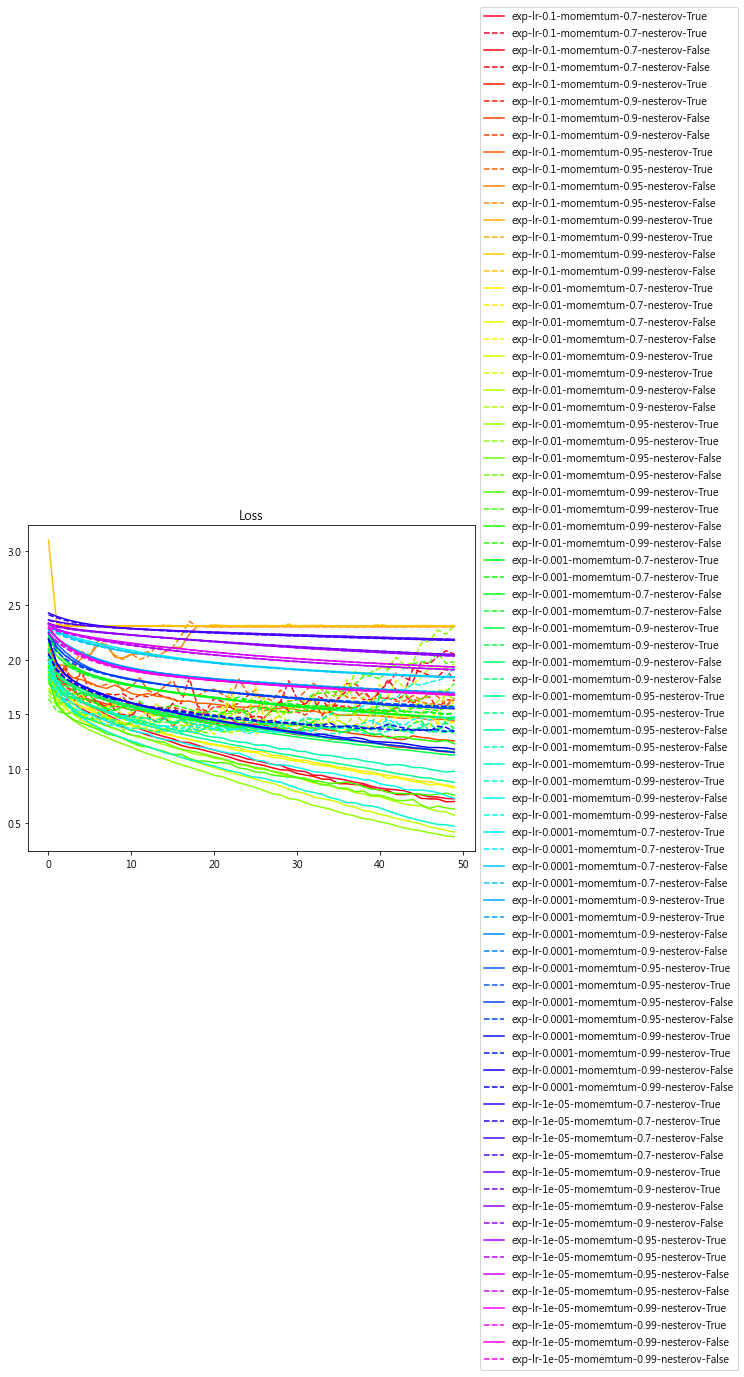

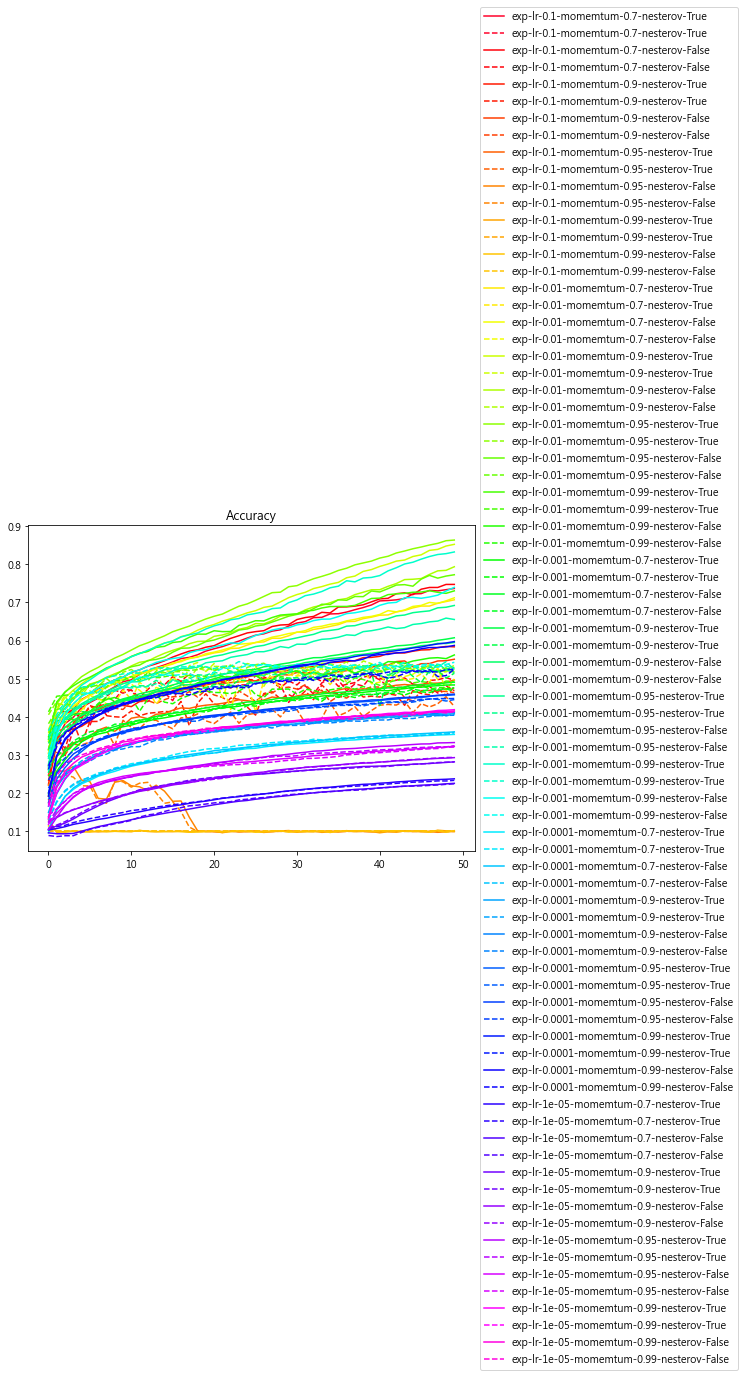

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline 
    
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()